In [64]:
#Introdcution to machine learning with Scikit Learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

%matplotlib inline

In [2]:
data_frame = pd.read_csv('Datasets.csv')

In [3]:
data_frame.shape

(768, 9)

In [4]:
data_frame.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [5]:
data_frame.tail()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64


In [6]:
print data_frame.isnull().values.any()

False


C:\Users\Mithun\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Users\Mithun\Anaconda2\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


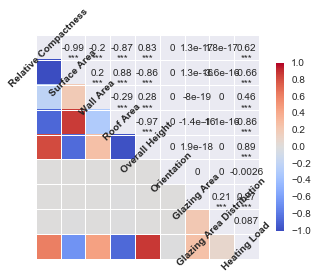

In [8]:
sns.corrplot(data_frame,annot=True)

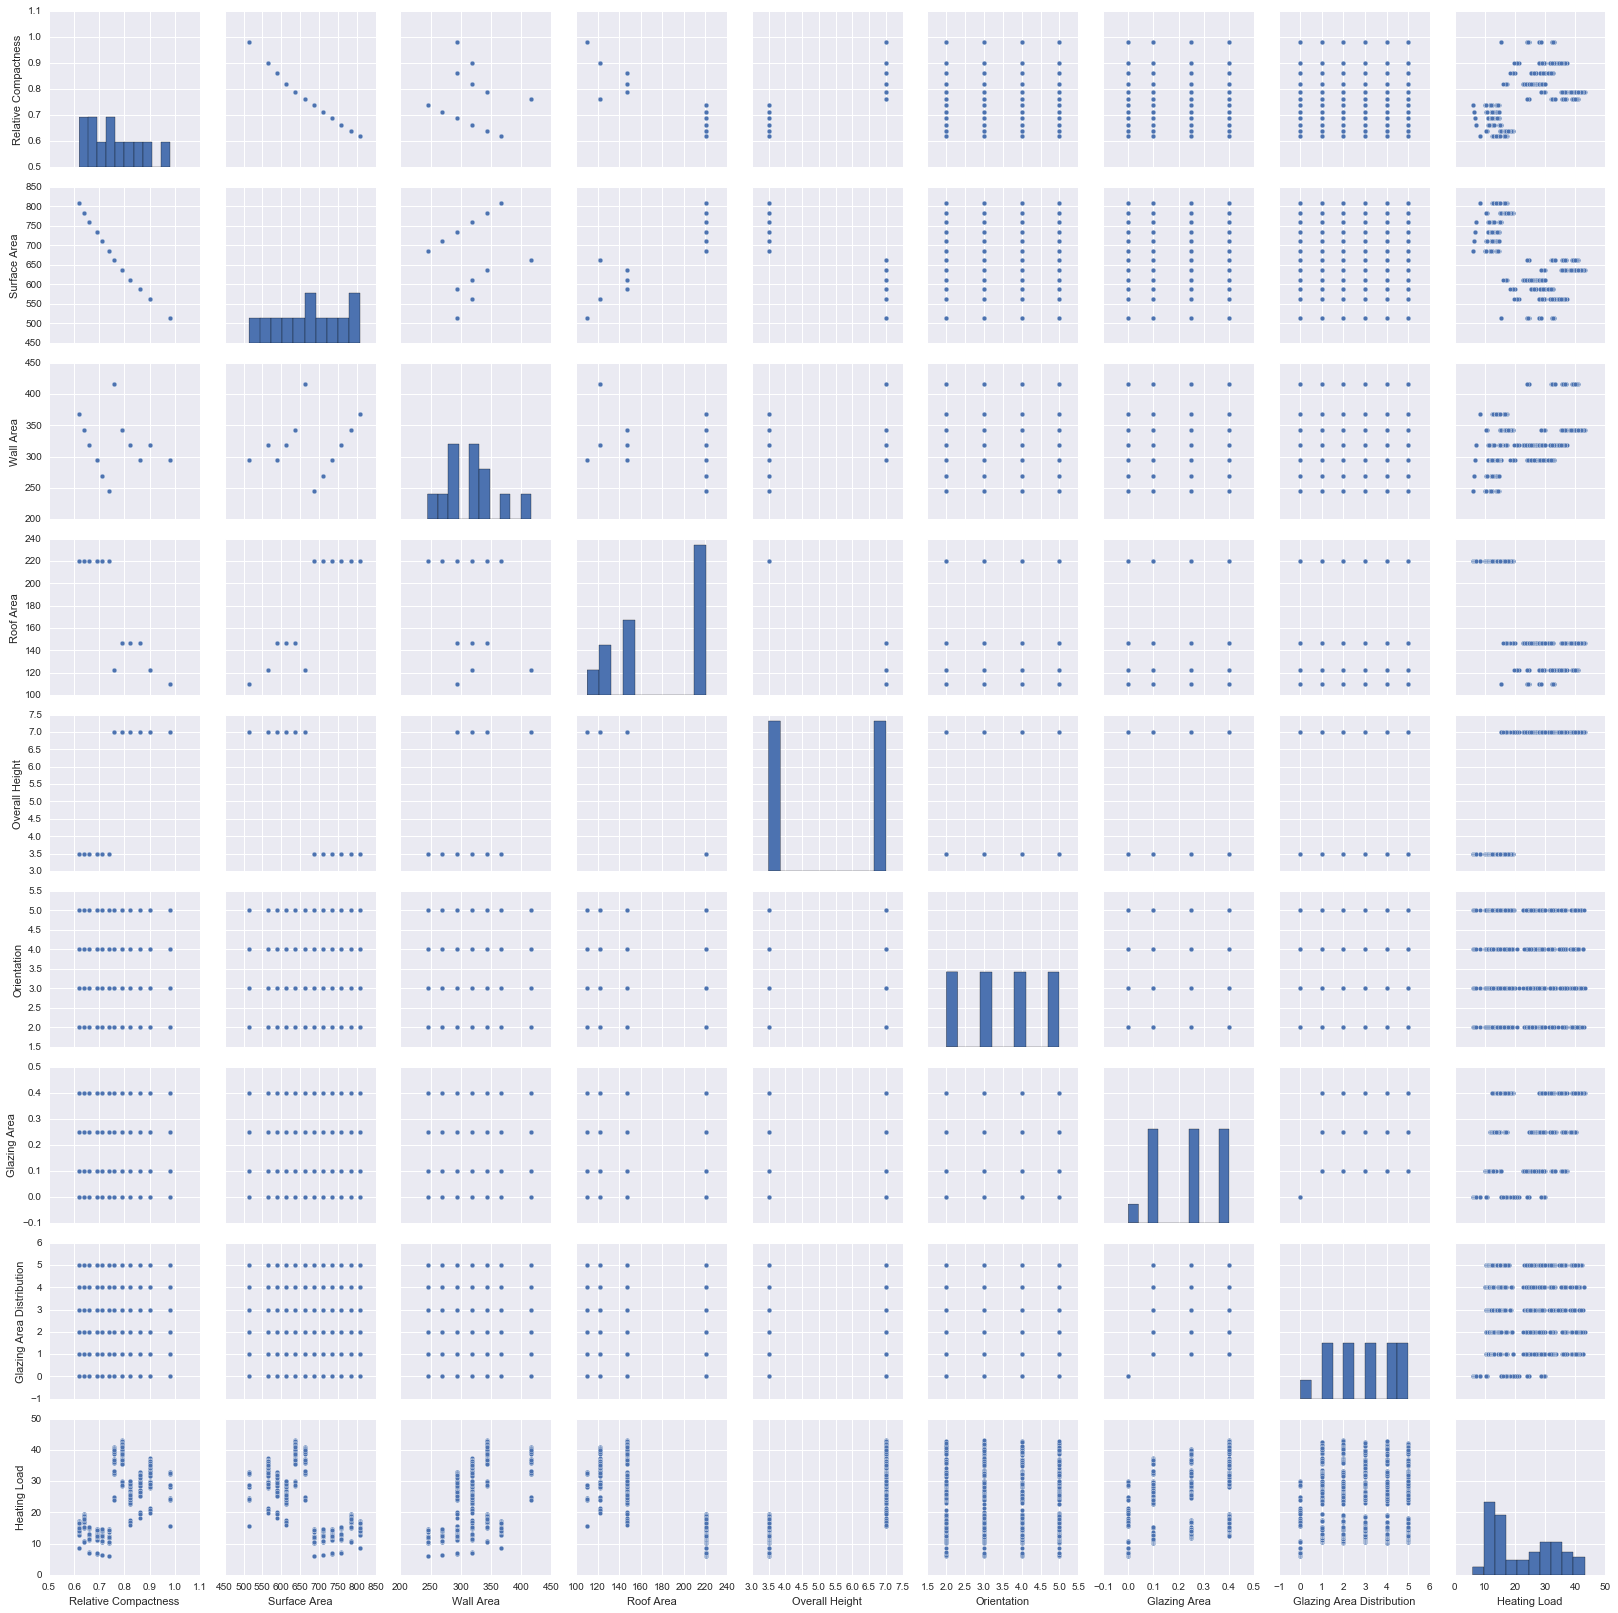

In [9]:
sns.pairplot(data_frame)

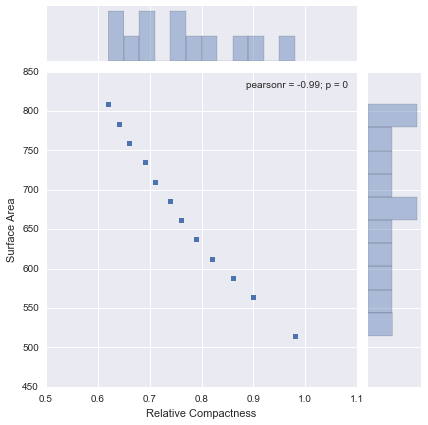

In [10]:
sns.jointplot(data_frame['Relative Compactness'],data_frame['Surface Area'],kind='scatter')

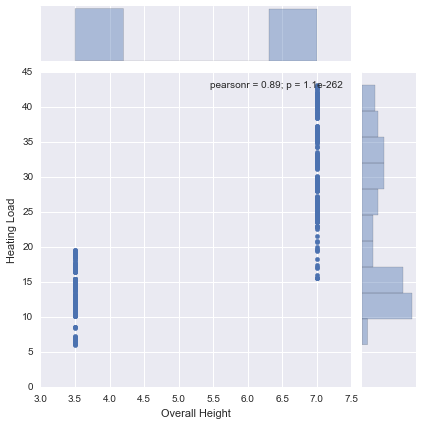

In [11]:
sns.jointplot(data_frame['Overall Height'],data_frame['Heating Load'],kind='scatter')

In [12]:
del data_frame['Overall Height']

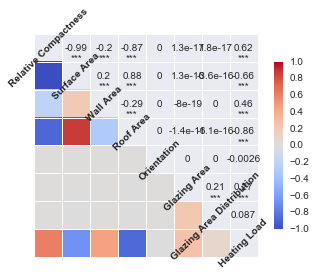

In [13]:
sns.corrplot(data_frame,annot=True)

In [14]:
del data_frame['Surface Area']

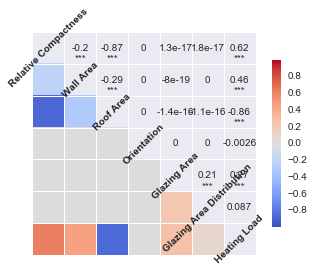

In [15]:
sns.corrplot(data_frame,annot=True)

In [16]:
del data_frame['Relative Compactness']

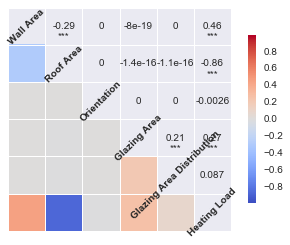

In [17]:
sns.corrplot(data_frame,annot=True)

In [18]:
data_frame.head()

,Wall Area,Roof Area,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,294.0,110.25,2,0.0,0,15.55
1,294.0,110.25,3,0.0,0,15.55
2,294.0,110.25,4,0.0,0,15.55
3,294.0,110.25,5,0.0,0,15.55
4,318.5,122.50,2,0.0,0,20.84


In [20]:
def func(data):
    if data <= float(25):
        return 0
    else:
        return 1

In [21]:
data_frame['Heating Load']=data_frame['Heating Load'].apply(func)

In [22]:
data_frame.head()

,Wall Area,Roof Area,Orientation,Glazing Area,Glazing Area Distribution,Heating Load
0,294.0,110.25,2,0.0,0,0
1,294.0,110.25,3,0.0,0,0
2,294.0,110.25,4,0.0,0,0
3,294.0,110.25,5,0.0,0,0
4,318.5,122.50,2,0.0,0,0


In [24]:
feature_column_names = ['Wall Area','Roof Area','Orientation','Glazing Area','Glazing Area Distribution']
predicted_class_name=['Heating Load']

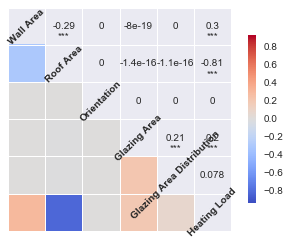

In [23]:
sns.corrplot(data_frame,annot=True)

In [25]:
X = data_frame[feature_column_names].values

In [26]:
y = data_frame[predicted_class_name].values

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
print "{0:0.2f}% in training set".format(float(len(X_train)/float(len(data_frame)))*100)

69.92% in training set


In [29]:
print "rows in dataframe:: {}".format(len(data_frame))

rows in dataframe:: 768


In [30]:
print "rows having zero value in Wall Area:: {}".format(len(data_frame.loc[data_frame['Wall Area']==0]))

rows having zero value in Wall Area:: 0


In [31]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train.ravel())

GaussianNB()

In [32]:
prediction_from_trained_data = nb_model.predict(X_train)

In [33]:
accuracy = metrics.accuracy_score(y_train,prediction_from_trained_data)

In [34]:
print "Accuracy of our naive bayes model is:{0:.4f}".format(accuracy)

Accuracy of our naive bayes model is:0.9274


In [35]:
prediction_from_test_data = nb_model.predict(X_test)

In [36]:
accuracy = metrics.accuracy_score(y_test,prediction_from_test_data)

In [37]:
print "Accuracy of our naive bayes model is:{0:.4f}".format(accuracy)

Accuracy of our naive bayes model is:0.9091


In [39]:
#Performance testing for Classification type model:
print "Confusion Matrix"

print "{}".format(metrics.confusion_matrix(y_test,prediction_from_test_data,labels=[1,0]))
print "{}".format(metrics.classification_report(y_test,prediction_from_test_data,labels=[1,0]))

Confusion Matrix
[[101   0]
 [ 21 109]]
             precision    recall  f1-score   support

          1       0.83      1.00      0.91       101
          0       1.00      0.84      0.91       130

avg / total       0.92      0.91      0.91       231



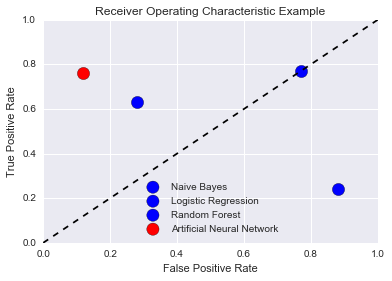

In [43]:
#ROC Curve Plotting:::
#From Wikipedia:::

naive_bayes = np.array([0.28,0.63])
logistic = np.array([0.77,0.77])
random_forest = np.array([0.88,0.24])
ann = np.array([0.12,0.76])

plt.scatter(naive_bayes[0],naive_bayes[1],label='Naive Bayes',facecolors='blue',edgecolors='black',s=150)
plt.scatter(logistic[0],logistic[1],label='Logistic Regression',facecolors='blue',edgecolors='black',s=150)
plt.scatter(random_forest[0],random_forest[1],label='Random Forest',facecolors='blue',edgecolors='black',s=150)
plt.scatter(ann[0],ann[1],label='Artificial Neural Network',facecolors='red',edgecolors='black',s=150)

plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc='lower center')

In [46]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rf_predict_train = rf_model.predict(X_train)
rf_accuracy = metrics.accuracy_score(y_train,rf_predict_train)

In [48]:
print 'Accuracy {0:.4f}'.format(rf_accuracy)

Accuracy 0.9981


In [49]:
rf_predict_test = rf_model.predict(X_test)
rf_accuracy_test_data = metrics.accuracy_score(y_test,rf_predict_test)

In [50]:
print 'Accuracy {0:.4f}'.format(rf_accuracy_test_data)

Accuracy 0.9827


In [51]:
print 'Accuracy {0:.4f}'.format(rf_accuracy_test_data)
print 'Confusion matrix for random forest'

print '{}'.format(metrics.confusion_matrix(y_test,rf_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,rf_predict_test,labels=[1,0]))

Accuracy 0.9827
Confusion matrix for random forest
[[101   0]
 [  4 126]]

Classification Report

             precision    recall  f1-score   support

          1       0.96      1.00      0.98       101
          0       1.00      0.97      0.98       130

avg / total       0.98      0.98      0.98       231



In [58]:
#Regularization Hypermeter Tuning with logistic regression:
lr_model = LogisticRegression(C=0.7)
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [59]:
print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[ 97   4]
 [ 20 110]]

Classification Report

             precision    recall  f1-score   support

          1       0.83      0.96      0.89       101
          0       0.96      0.85      0.90       130

avg / total       0.91      0.90      0.90       231



1st max value of 0.980 occured at C=1.700


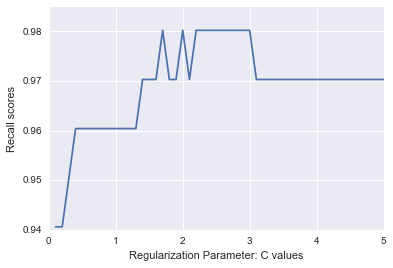

In [60]:
#Value calculation of regularization parameter (C):

C_values,recall_scores = [],[]

C_val = 0.1

best_recall_score = 0

while(C_val< 5):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val)
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score>best_recall_score):
        best_recall_score=recall_score
        
    C_val = C_val + 0.1
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {0:0.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val)

plt.plot(C_values,recall_scores,"-")
plt.xlabel("Regularization Parameter: C values")
plt.ylabel("Recall scores")

1st max value of 0.990 occured at C=0.500


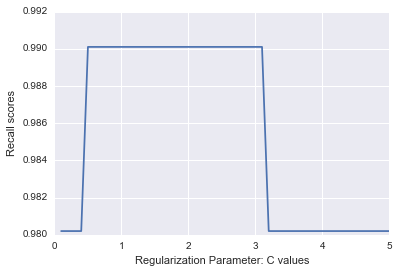

In [61]:
#Value calculation of regularization parameter with class weight "balanced":

C_values,recall_scores = [],[]

C_val = 0.1

best_recall_score = 0

while(C_val< 5):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C= C_val, class_weight="balanced")
    lr_model_loop.fit(X_train,y_train.ravel())
    lr_predict_loop_test=lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test,lr_predict_loop_test)
    recall_scores.append(recall_score)
    
    if (recall_score>best_recall_score):
        best_recall_score=recall_score
        
    C_val = C_val + 0.1
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]

print "1st max value of {0:0.3f} occured at C={1:.3f}".format(best_recall_score,best_score_C_val)

plt.plot(C_values,recall_scores,"-")
plt.xlabel("Regularization Parameter: C values")
plt.ylabel("Recall scores")

In [63]:
lr_model = LogisticRegression(C=best_score_C_val,class_weight="balanced")
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)


print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[100   1]
 [ 21 109]]

Classification Report

             precision    recall  f1-score   support

          1       0.83      0.99      0.90       101
          0       0.99      0.84      0.91       130

avg / total       0.92      0.90      0.91       231



In [65]:
lr_model = LogisticRegressionCV(n_jobs=1,Cs=3,cv=10,refit=False,class_weight="balanced")
lr_model.fit(X_train,y_train.ravel())
lr_predict_test = lr_model.predict(X_test)


print 'Confusion matrix for LogisticRegression'

print '{}'.format(metrics.confusion_matrix(y_test,lr_predict_test,labels=[1,0]))

print ""

print 'Classification Report\n'

print '{}'.format(metrics.classification_report(y_test,lr_predict_test,labels=[1,0]))

Confusion matrix for LogisticRegression
[[101   0]
 [ 22 108]]

Classification Report

             precision    recall  f1-score   support

          1       0.82      1.00      0.90       101
          0       1.00      0.83      0.91       130

avg / total       0.92      0.90      0.91       231

